### MRI+EEG-MMSE

RMSE (Training): 1.6812
RMSE (Testing): 2.3186
R² (Training): 0.6974
R² (Testing): 0.4243


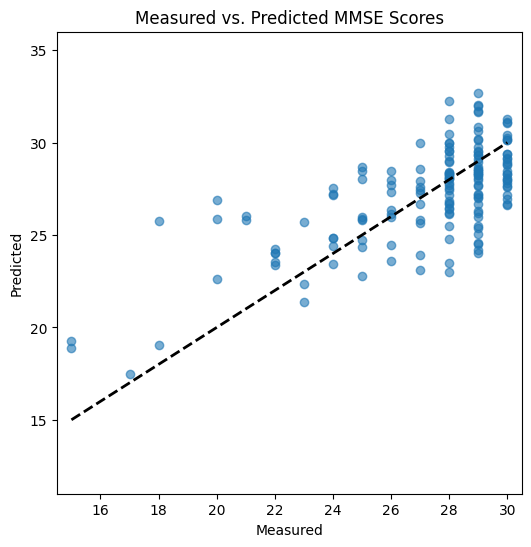

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut
from scipy.stats import kendalltau, pearsonr, spearmanr

# Load dataset
df = pd.read_excel(r'/mri_eeg_mmse_0328C.xlsx')

# Select feature columns
X = df[
    [
        'sigma_bandpower_kurtosis_c_n2', 'vol-cerebral cortex', 'vol-total_ventricle',
        'slow_bandpower_kurtosis_f_n2', 'slowdelta/fast_std_c_w', 'sigma_bandpower_kurtosis_f_n2',
        'qc-hippocampus+amygdala', 'delta_bandpower_kurtosis_f_n2', 'theta/alpha_std_f_w',
        'vol-inferior lateral ventricle', 'vol-ventral dc', 'fs_coupl_mag_f', 'theta/alpha_min_f_r',
        'slow_bandpower_kurtosis_f_r', 'theta/alpha_min_o_r', 'delta/alpha_std_c_w',
        'theta/alpha_min_f_n1', 'waso', 'theta_bandpower_min_f_r', 'vol-pallidum',
        'theta_bandpower_mean_f_r', 'ss_chirp_c', 'theta/alpha_mean_f_r', 'theta/alpha_mean_o_r',
        'theta_bandpower_mean_c_r', 'fs_isa_m_c', 'slow_bandpower_mean_c_w', 'slowdelta/fast_std_o_r',
        'delta_bandpower_std_c_r', 'theta/alpha_mean_f_n2', 'delta_bandpower_mean_c_w',
        'slow/delta_mean_f_n1', 'slow_bandpower_std_o_w', 'so_dur_f', 'theta_bandpower_std_f_w',
        'theta/alpha_std_f_r', 'sigma_bandpower_kurtosis_f_r', 'fs_dens_f', 'theta/alpha_mean_f_n1',
        'theta_bandpower_std_c_r', 'theta/alpha_min_c_r', 'fs_isa_t_c', 'theta/alpha_std_o_w',
        'theta_bandpower_std_c_w', 'delta/alpha_std_o_r', 'theta/alpha_std_o_r',
        'slow_bandpower_std_c_r', 'mean_gradient_o2-m1_n3'
    ]
]

# Target variable
y = df['mmse1']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(14.5, 30.5)
plt.ylim(11, 36)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted MMSE Scores')
plt.show()



### EEG-MMSE

RMSE (Training): 1.9299
RMSE (Testing): 2.6663
R² (Training): 0.6012
R² (Testing): 0.2387


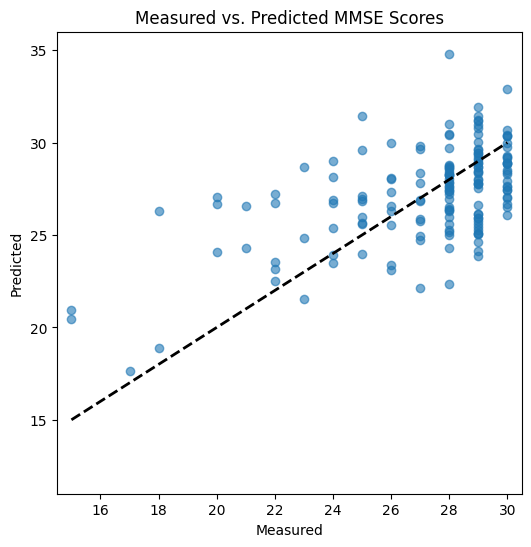

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

# Load dataset
df = pd.read_excel(r'/mri_eeg_mmse_0328C.xlsx')

# Select feature columns
X = df[
    [
        'sigma_bandpower_kurtosis_c_n2', 'slow_bandpower_kurtosis_f_n2', 'slowdelta/fast_std_c_w',
        'sigma_bandpower_kurtosis_f_n2', 'delta_bandpower_kurtosis_f_n2', 'theta/alpha_std_f_w',
        'fs_coupl_mag_f', 'theta/alpha_min_f_r', 'slow_bandpower_kurtosis_f_r', 'theta/alpha_min_o_r',
        'delta/alpha_std_c_w', 'theta/alpha_min_f_n1', 'waso', 'theta_bandpower_min_f_r',
        'theta_bandpower_mean_f_r', 'ss_chirp_c', 'theta/alpha_mean_f_r', 'theta/alpha_mean_o_r',
        'theta_bandpower_mean_c_r', 'fs_isa_m_c', 'slow_bandpower_mean_c_w', 'slowdelta/fast_std_o_r',
        'delta_bandpower_std_c_r', 'theta/alpha_mean_f_n2', 'delta_bandpower_mean_c_w',
        'slow/delta_mean_f_n1', 'slow_bandpower_std_o_w', 'so_dur_f', 'theta_bandpower_std_f_w',
        'theta/alpha_std_f_r', 'sigma_bandpower_kurtosis_f_r', 'fs_dens_f', 'theta/alpha_mean_f_n1',
        'theta_bandpower_std_c_r', 'theta/alpha_min_c_r', 'fs_isa_t_c', 'theta/alpha_std_o_w',
        'theta_bandpower_std_c_w', 'delta/alpha_std_o_r', 'theta/alpha_std_o_r',
        'slow_bandpower_std_c_r', 'mean_gradient_o2-m1_n3'
    ]
]

# Target variable
y = df['mmse1']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(14.5, 30.5)
plt.ylim(11, 36)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted MMSE Scores')
plt.show()


### MRI-MMSE

RMSE (Training): 2.5149
RMSE (Testing): 2.7823
R² (Training): 0.3227
R² (Testing): 0.1711


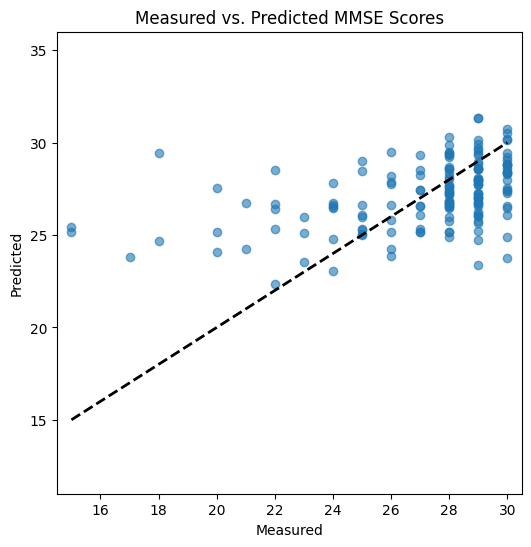

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import LeaveOneOut

# Load dataset
df = pd.read_excel(r'/mri_eeg_mmse_0328C.xlsx')

# Select feature columns
X = df[
    [
        'vol-amygdala', 'vol-total_ventricle', 'vol-accumbens area',
        'vol-inferior lateral ventricle', 'vol-ctx--posteriorcingulate',
        'vol-ctx--lateraloccipital', 'vol-pallidum', 'vol-ctx--lingual',
        'vol-csf', 'vol-ctx--insula', 'vol-ctx--rostralmiddlefrontal',
        'vol-ctx--superiortemporal', 'vol-ctx--parsopercularis',
        'vol-ctx--temporalpole', 'vol-ctx--caudalanteriorcingulate',
        'vol-ctx--frontalpole'
    ]
]

# Target variable
y = df['mmse1']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(14.5, 30.5)
plt.ylim(11, 36)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs. Predicted MMSE Scores')
plt.show()


### MRI+EEG-Age

RMSE (Training): 6.8066
RMSE (Testing): 7.3338
MAE (Training): 5.3661
MAE (Testing): 5.7939
R² (Training): 0.7035
R² (Testing): 0.6558


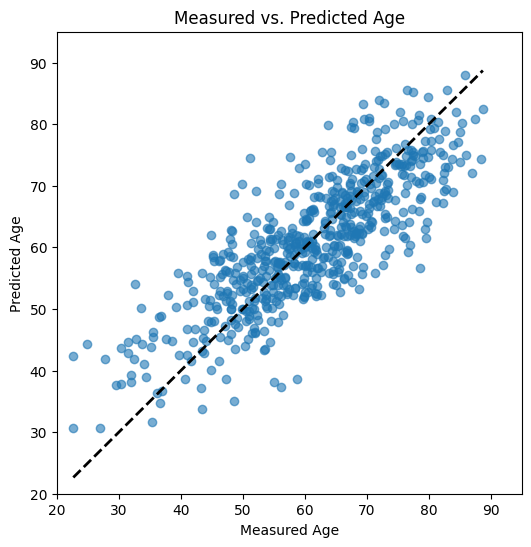

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneOut

# Load dataset
df = pd.read_csv(r'/0510.csv')

# Select feature columns
X = df[
    [
        'vol-thalamus', 'vol-putamen', 'vol-striatum', 'vol-csf', 'vol-lateral ventricle',
        'vol-total_ventricle', 'vol-cerebral cortex', 'vol-3rd ventricle',
        'sigma_bandpower_mean_c_n3', 'sigma_bandpower_mean_f_n3', 'theta_bandpower_kurtosis_f_n2',
        'vol-inferior lateral ventricle', 'vol-ventral DC', 'vol-caudate', 'vol-ctx--anterior',
        'sigma_bandpower_mean_c_n2', 'vol-ctx--rostralmiddlefrontal', 'fs_isa_t_f',
        'alpha_bandpower_kurtosis_c_n2', 'sigma_bandpower_min_c_n3', 'vol-ctx--supramarginal',
        'waso', 'fs_dens_f', 'sigma_bandpower_mean_o_n2', 'sigma_bandpower_min_o_n3',
        'fs_coupl_angle_c', 'sigma_bandpower_mean_o_n3', 'vol-ctx--superiorfrontal',
        'vol-ctx--parstriangularis', 'sigma_bandpower_min_c_n2', 'slow_bandpower_std_f_n3',
        'vol-cerebellum cortex', 'sigma_bandpower_kurtosis_o_w', 'theta_bandpower_kurtosis_f_n3',
        'ss_isa_m_f', 'delta_bandpower_mean_f_n3', 'ss_dens_c', 'vol-ctx--middletemporal',
        'delta/theta_min_c_w', 'ss_dens_f', 'delta_linear_b0', 'so_rate_f',
        'slow_bandpower_std_f_n2', 'vol-ctx--precuneus', 'ss_amp_f'
    ]
]

# Target variable (Age)
y = df['Age']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
mae_train = mean_absolute_error(y_train_total, y_pred_train_total)
mae_test = mean_absolute_error(y_test_total, y_pred_test_total)
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"MAE (Training): {mae_train:.4f}")
print(f"MAE (Testing): {mae_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(20, 95)
plt.ylim(20, 95)
plt.xlabel('Measured Age')
plt.ylabel('Predicted Age')
plt.title('Measured vs. Predicted Age')
plt.show()


### EEG-AGE

RMSE (Training): 8.5631
RMSE (Testing): 8.9950
MAE (Training): 6.7730
MAE (Testing): 7.1139
R² (Training): 0.5308
R² (Testing): 0.4823


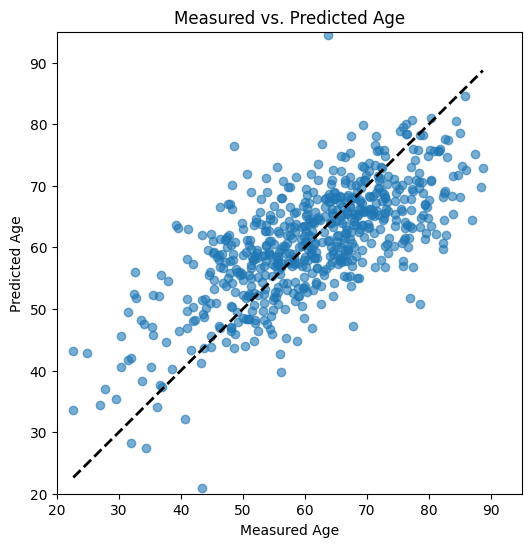

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneOut

# Load dataset
df = pd.read_csv(r'/0510.csv')

# Select feature columns
X = df[
    [
        'sigma_bandpower_mean_c_n3', 'sigma_bandpower_mean_f_n3', 'theta_bandpower_kurtosis_f_n2',
        'sigma_bandpower_mean_c_n2', 'fs_isa_t_f', 'alpha_bandpower_kurtosis_c_n2',
        'sigma_bandpower_min_c_n3', 'waso', 'fs_dens_f', 'sigma_bandpower_mean_o_n2',
        'sigma_bandpower_min_o_n3', 'fs_coupl_angle_c', 'sigma_bandpower_mean_o_n3',
        'sigma_bandpower_min_c_n2', 'slow_bandpower_std_f_n3', 'sigma_bandpower_kurtosis_o_w',
        'theta_bandpower_kurtosis_f_n3', 'ss_isa_m_f', 'delta_bandpower_mean_f_n3',
        'ss_dens_c', 'delta/theta_min_c_w', 'ss_dens_f', 'delta_linear_b0', 'so_rate_f',
        'slow_bandpower_std_f_n2', 'ss_amp_f'
    ]
]

# Target variable (Age)
y = df['Age']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
mae_train = mean_absolute_error(y_train_total, y_pred_train_total)
mae_test = mean_absolute_error(y_test_total, y_pred_test_total)
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"MAE (Training): {mae_train:.4f}")
print(f"MAE (Testing): {mae_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(20, 95)
plt.ylim(20, 95)
plt.xlabel('Measured Age')
plt.ylabel('Predicted Age')
plt.title('Measured vs. Predicted Age')
plt.show()


### MRI-AGE

RMSE (Training): 8.1466
RMSE (Testing): 8.4182
MAE (Training): 6.3669
MAE (Testing): 6.5775
R² (Training): 0.5753
R² (Testing): 0.5465


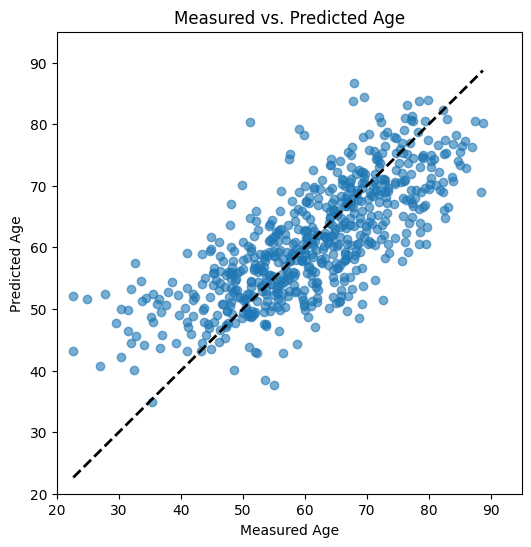

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import LeaveOneOut

# Load dataset
df = pd.read_csv(r'/0510.csv')

# Select feature columns (MRI volume-based features)
X = df[
    [
        'vol-thalamus', 'vol-putamen', 'vol-striatum', 'vol-csf', 'vol-lateral ventricle',
        'vol-total_ventricle', 'vol-cerebral cortex', 'vol-3rd ventricle', 'vol-inferior lateral ventricle',
        'vol-ventral DC', 'vol-caudate', 'vol-ctx--anterior', 'vol-ctx--rostralmiddlefrontal',
        'vol-ctx--supramarginal', 'vol-ctx--superiorfrontal', 'vol-ctx--parstriangularis',
        'vol-cerebellum cortex', 'vol-ctx--middletemporal', 'vol-ctx--precuneus'
    ]
]

# Target variable (Age)
y = df['Age']

# Convert DataFrame to NumPy arrays
X = X.values
y = y.values

# Leave-One-Out Cross-Validation (LOOCV)
loo = LeaveOneOut()
y_pred_test_total, y_pred_train_total = [], []
y_train_total, y_test_total = [], []

# Perform LOOCV
for train_idx, test_idx in loo.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test and train sets
    y_pred_test_total.append(model.predict(X_test))
    y_pred_train_total.append(model.predict(X_train))
    y_train_total.append(y_train)
    y_test_total.append(y_test)

# Flatten the predictions and true values
y_train_total = np.concatenate(y_train_total)
y_test_total = np.concatenate(y_test_total)
y_pred_train_total = np.concatenate(y_pred_train_total)
y_pred_test_total = np.concatenate(y_pred_test_total)

# Calculate performance metrics
rmse_train = np.sqrt(mean_squared_error(y_train_total, y_pred_train_total))
rmse_test = np.sqrt(mean_squared_error(y_test_total, y_pred_test_total))
mae_train = mean_absolute_error(y_train_total, y_pred_train_total)
mae_test = mean_absolute_error(y_test_total, y_pred_test_total)
r2_train = r2_score(y_train_total, y_pred_train_total)
r2_test = r2_score(y_test_total, y_pred_test_total)

# Print results
print(f"RMSE (Training): {rmse_train:.4f}")
print(f"RMSE (Testing): {rmse_test:.4f}")
print(f"MAE (Training): {mae_train:.4f}")
print(f"MAE (Testing): {mae_test:.4f}")
print(f"R² (Training): {r2_train:.4f}")
print(f"R² (Testing): {r2_test:.4f}")

# Scatter plot of true vs. predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test_total, y_pred_test_total, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlim(20, 95)
plt.ylim(20, 95)
plt.xlabel('Measured Age')
plt.ylabel('Predicted Age')
plt.title('Measured vs. Predicted Age')
plt.show()
